<h1 style="color:white; background-color:darkolivegreen;"><center style="font-size:50px">Zoo Zooo Zoooo</center><br><center style="font-size:20px">Author: Marco Lin</center></h1>

![](http://images.onlyfatrabbit.com/uploads/2013/07/tumblr_mqs1hxMrUh1rkk59qo1_1280.jpg)

<h2><center style="font-size:30px"><u style="color: darkolivegreen">Objective of the Proposed Research</u></center></h2>

The newly created Stockton Zoo contracted me to work on the zoo design based on animal characteristics. So, before we start our clustering, we will explore our dataset to see what information we have now. We will explore in four different aspects of data. First, we will see how many domestic and international animals. And, how many species in each class type they offer to us. Then, we will understand how many venomous and predator animals will in this zoo because the clustering we will do will foucs on the characteristics they have that how they protect themselves. Second, for culstering we will make new columns for prediction. Depending on the characteristics, we create three new columns: “care” meaning the animal need to be more care, “strong” meaning how the animal can protect themselves, and “rate” will be strong column divided care column. For care column, I will sum the columns eggs, milk, domestic, breathes, and aquatic. Strong columns will be predator, venomous, toothed, airborne, and legs. After those, we will make prediction. Ending with summary and recommendation. 

<h2><center style="font-size:30px"><u style="color: darkolivegreen">Data Exploration</u></center></h2>

In [323]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [324]:
zooData = pd.read_csv('zoo-animal-classification/zoo.csv')
classData = pd.read_csv('zoo-animal-classification/class.csv')

In [325]:
classData.set_index(['Class_Type'], inplace = True)

<p style="font-size:20px;"><u style="color: darkolivegreen">A. Domestic and International Animal number</u></p>

In [326]:
zooData['domestic'].value_counts()

0    88
1    13
Name: domestic, dtype: int64

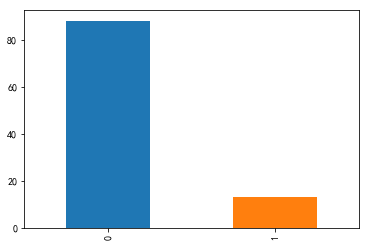

In [327]:
zooData['domestic'].value_counts().plot.bar()

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
It shows that we have 88 domestic animals and 13 international animals

<p style="font-size:20px;"><u style="color: darkolivegreen">B. The number of  Animal species in each Class</u></p>

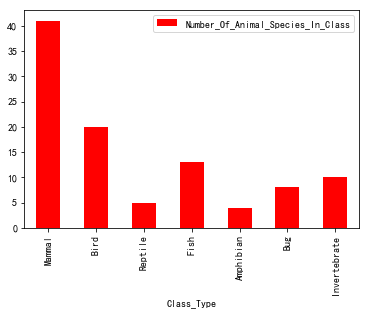

In [328]:
classData[['Number_Of_Animal_Species_In_Class']].plot.bar(color = "red")

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
Most animals are mammal. There is over 40 animals. And, the second higher number of animal is bird. Reptile and Amphibian are the less.

<p style="font-size:20px;"><u style="color: darkolivegreen">C. Venomous Animal</u></p>

In [329]:
zooData['venomous'].value_counts()

0    93
1     8
Name: venomous, dtype: int64

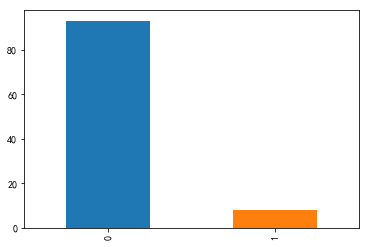

In [330]:
zooData['venomous'].value_counts().plot.bar()

In [331]:
mask1 = zooData['venomous'] == 1

In [332]:
temp1 = zooData[['venomous','class_type']]
venom = temp1[mask1]
venom

,venomous,class_type
26,1,5
39,1,6
62,1,3
72,1,7
76,1,3
77,1,7
86,1,4
97,1,6


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
There is only 8 venomous animals. They are in different class type: 3:Reptile, 4:Fish, 5:Amphibian, 6:Bug, 7:Invertebrate. We can establish a separated area for them becasue they might be dangerous.

<p style="font-size:20px;"><u style="color: darkolivegreen">D. Predator Animal</u></p>

In [333]:
zooData['predator'].value_counts()

1    56
0    45
Name: predator, dtype: int64

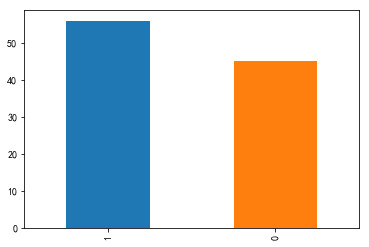

In [334]:
zooData['predator'].value_counts().plot.bar()

In [335]:
mask2 = zooData['predator'] == 1
temp2 = zooData[['predator','class_type']]
preda = temp2[mask2]
preda['class_type'].value_counts()

1    22
4     9
2     9
7     8
3     4
5     3
6     1
Name: class_type, dtype: int64

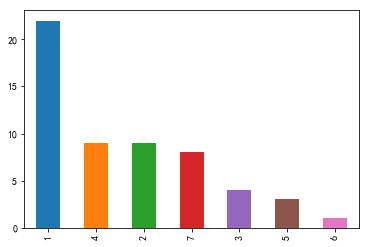

In [336]:
preda['class_type'].value_counts().plot.bar()

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>

There are half number of animals are predator up to 56. They are in different class type, Mammal type is the most. We are a little bit dangerous, so we also can make a area for predator animals. In this area, it will be classified into three main part for Bird, Fish, and Mammal.

<h2><center style="font-size:30px"><u style="color: darkolivegreen">KNN Function</u></center></h2>

<p style="font-size:20px;"><u style="color: darkolivegreen">A. New columns</u></p>

<p style="font-size:20px;"><u style="color: darkolivegreen">1. Care column</u></p>

In [337]:
zooData['care'] = (np.sqrt(zooData.eggs*3+zooData.milk*3+zooData.domestic*1.5+zooData.breathes*2+zooData.aquatic))*1000

In [338]:
zooData['care'].head()

0    2236.067977
1    2236.067977
2    2000.000000
3    2236.067977
4    2236.067977
Name: care, dtype: float64

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>

This column will sum the columns eggs, milk, domestic, breathes, and aquatic. This is because the animal who has egg they might be protected for enemy. and also like milk, domestic, breadth, aquatic.

<p style="font-size:20px;"><u style="color: darkolivegreen">2. Strong column</u></p>

In [339]:
zooData['strong'] = (np.sqrt(zooData.predator*2.5+zooData.venomous*3+zooData.toothed+zooData.airborne+zooData.legs*2))*1000

In [340]:
zooData['strong'].head()

0    3391.164992
1    3000.000000
2    1870.828693
3    3391.164992
4    3391.164992
Name: strong, dtype: float64

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>

This column will sum predator, venomous, toothed, airborn, and legs. They are the charactics which animal can pretect themselves

<p style="font-size:20px;"><u style="color: darkolivegreen">3. Rate column</u></p>

In [341]:
zooData['rate'] = round(zooData.strong/zooData.care)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>

The Strong column divided by Care column that we can get a column we call rate. Higher rate means animals are stronger to protect themselves. Lower rate means animals are weaker. 

In [342]:
zooData['rate']=zooData['rate'].astype(int)

In [343]:
zooData['rate'] = (zooData.rate)+1

In [344]:
zooData['care']=zooData['care'].astype(int)

In [345]:
zooData['strong']=zooData['strong'].astype(int)

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
In rate column, we classify the animals to four group. 

In [346]:
predictionData = zooData[['strong','care','rate']]

In [347]:
predictionDataFUN = zooData[['strong','care','rate']]

In [349]:
predictionDataFUN.head()

,strong,care,rate
0,3391,2236,3
1,3000,2236,2
2,1870,2000,2
3,3391,2236,3
4,3391,2236,3


<p style="font-size:20px;"><u style="color: darkolivegreen">B. Data Visualization</u></p>

/Users/MrM/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'care')

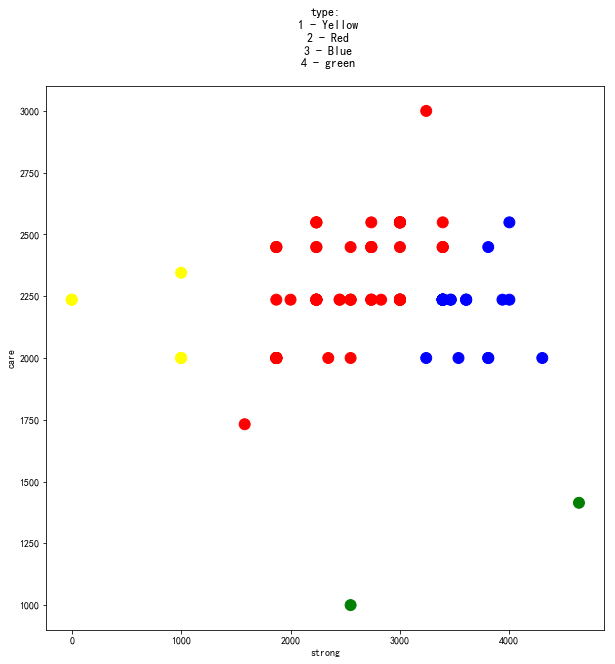

In [230]:
fig = plt.figure(figsize=(10,10))
colormap = np.array(['black', 'yellow', 'red', 'blue', 'green'])
 
plt.scatter(predictionData.strong, predictionData.care, 
            c = colormap[zooData.rate], s = 120)
plt.title('type:\n 1 - Yellow\n 2 - Red\n 3 - Blue\n 4 - green\n')
ax = fig.add_subplot(111)
ax.set_xlabel('strong')
ax.set_ylabel('care')

<p style="font-size:20px;"><u style="color: darkolivegreen">C. Prediction of KNN function</u></p>

In [372]:
def predictKNN():
    
    Kvalue = int(input('k : '))
    strongValue = int(input('how strong : '))
    careValue = int(input('how need to be care: '))
    rateValue = 0
    point = np.array([strongValue, careValue, rateValue])
        #2.distance
    predictionDataFUN["Dist"] = np.sqrt((predictionDataFUN.strong - point[0])**2 + (predictionDataFUN.care - point[1])**2)
        #3.sort
    predictionDataFUN2 = predictionDataFUN.sort_values(by= "Dist", ascending=[False]).head(Kvalue)
        #4.checking neborhood 
    typedata = predictionDataFUN2['rate'].value_counts()
    print(typedata[:1])

<p style="font-size:20px;"><u style="color: darkolivegreen">C.1</u></p>

In [384]:
predictKNN()

k : 2
how strong : 2750
how need to be care: 3000
1    2
Name: rate, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this species belongs rate 1 and there are two neighbors which are also rate 1.

<p style="font-size:20px;"><u style="color: darkolivegreen">C.2</u></p>

In [379]:
predictKNN()

k : 5
how strong : 2000
how need to be care: 100
3    3
Name: rate, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this species belongs rate 3 and there are 3 neighbors which are also rate 3.

<p style="font-size:20px;"><u style="color: darkolivegreen">C.3</u></p>

In [380]:
predictKNN()

k : 3
how strong : 255
how need to be care: 100
3    2
Name: rate, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this species belongs rate 3 and there are 2 neighbors which are also rate 3.

<p style="font-size:20px;"><u style="color: darkolivegreen">C.4</u></p>

In [383]:
predictKNN()

k : 5
how strong : 4000
how need to be care: 2000
1    5
Name: rate, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this species belongs rate 1 and there are 5 neighbors which are also rate 1.

<p style="font-size:20px;"><u style="color: darkolivegreen">C.5</u></p>

In [382]:
predictKNN()

k : 3
how strong : 2199
how need to be care: 500
1    2
Name: rate, dtype: int64


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>
We predict this species belongs rate 1 and there are 2 neighbors which are also rate 1.

<h2><center style="font-size:30px"><u style="color: darkolivegreen">sklearn.neighbor</u></center></h2>

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>

The plot shows that four groups of type we set.

<p style="font-size:20px;"><u style="color: darkolivegreen">1. KNN Algorithm</u></p>

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
knn = KNeighborsClassifier(n_neighbors = 5, 
                           p = 2)# p=2 for euclidean distance
knn.fit(predictionData[["strong", "care"]], 
        zooData.rate)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>

Use KNN neighborsclassifier library to predict.

<p style="font-size:20px;"><u style="color: darkolivegreen">2. prediction</u></p>

<p style="font-size:20px;"><u style="color: darkolivegreen">a.</u></p>

In [119]:
# make prediction
strong = int(input('how strong: '))
care = int(input('how need to be care: '))
data_class = knn.predict(np.array([strong, care]).reshape(1, -1))[0]
class_name = ["black", "Yellow", "Red", "Blue", "Green"]
print('Prediction: type #', data_class, class_name[data_class])

how strong: 29394
how need to be care: 5882
Prediction: type # 3 Blue


<p style="font-size:20px;"><u style="color: darkolivegreen">b.</u></p>

In [120]:
# make prediction
strong = int(input('how strong: '))
care = int(input('how need to be care: '))
data_class = knn.predict(np.array([strong, care]).reshape(1, -1))[0]
class_name = ["black", "Yellow", "Red", "Blue", "Green"]
print('Prediction: type #', data_class, class_name[data_class])

how strong: 98583
how need to be care: 2282
Prediction: type # 3 Blue


<p style="font-size:20px;"><u style="color: darkolivegreen">c.</u></p>

In [121]:
# make prediction
strong = int(input('how strong: '))
care = int(input('how need to be care: '))
data_class = knn.predict(np.array([strong, care]).reshape(1, -1))[0]
class_name = ["black", "Yellow", "Red", "Blue", "Green"]
print('Prediction: type #', data_class, class_name[data_class])

how strong: 928
how need to be care: 4000
Prediction: type # 2 Red


<p style="font-size:20px;"><u style="color: darkolivegreen">d.</u></p>

In [122]:
# make prediction
strong = int(input('how strong: '))
care = int(input('how need to be care: '))
data_class = knn.predict(np.array([strong, care]).reshape(1, -1))[0]
class_name = ["black", "Yellow", "Red", "Blue", "Green"]
print('Prediction: type #', data_class, class_name[data_class])

how strong: 500
how need to be care: 123
Prediction: type # 1 Yellow


<p style="font-size:20px;"><u style="color: darkolivegreen">e.</u></p>

In [123]:
# make prediction
strong = int(input('how strong: '))
care = int(input('how need to be care: '))
data_class = knn.predict(np.array([strong, care]).reshape(1, -1))[0]
class_name = ["black", "Yellow", "Red", "Blue", "Green"]
print('Prediction: type #', data_class, class_name[data_class])

how strong: 500
how need to be care: 10000
Prediction: type # 2 Red


<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>

When we input the values how strong and how need to be care. we can classify into this four group.

<h2><center style="font-size:30px"><u style="color: darkolivegreen">Prediction Mesh</u></center></h2>

/Users/MrM/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


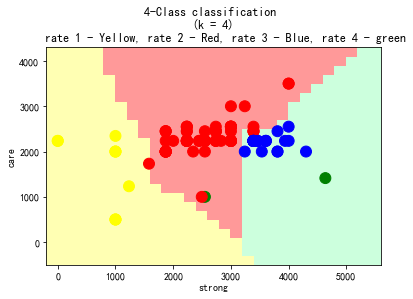

In [141]:
def plotMesh():
    h = 200
    # Create color maps
    cmap_light = ListedColormap(['#ffffb3', '#d6d6f5','#ff9999','#ccffdd'])
    colormap = np.array(['black', 'yellow', 'red', 'blue', 'green'])
    x_min, x_max = predictionData.strong.min()-200, predictionData.strong.max()+1000
    y_min, y_max = predictionData.care.min() - 1000, predictionData.care.max() + 1000
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
 # Plot also the training points
    plt.scatter(predictionData.strong, predictionData.care, c = colormap[predictionData.rate], s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification \n(k = %i)\n\
    rate 1 - Yellow, rate 2 - Red, rate 3 - Blue, rate 4 - green" % (4))
    ax = fig.add_subplot(111)
    ax.set_xlabel('strong')
    ax.set_ylabel('care')
plotMesh()

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>

This is our prediction mesh.

how strong: 1000
how need to be care: 500
Prediction: type # 1 Yellow


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/MrM/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


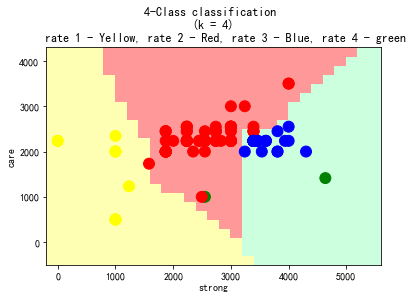

In [142]:
# make prediction
strong = int(input('how strong: '))
care = int(input('how need to be care: '))
data_class = knn.predict(np.array([strong, care]).reshape(1, -1))[0]
class_name = ["black", "Yellow", "Red", "Blue", "Green"]
print('Prediction: type #', data_class, class_name[data_class])

predictionData.loc[len(predictionData)]=[strong, care, data_class]
knn.fit(predictionData[["strong", "care"]], predictionData.rate)
plotMesh()

how strong: 3000
how need to be care: 4000
Prediction: type # 2 Red


/Users/MrM/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/MrM/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


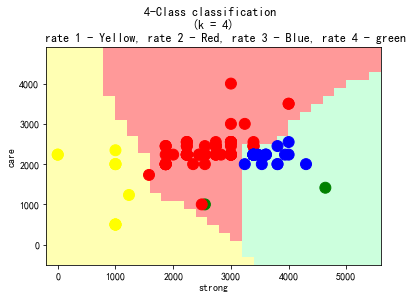

In [143]:
# make prediction
strong = int(input('how strong: '))
care = int(input('how need to be care: '))
data_class = knn.predict(np.array([strong, care]).reshape(1, -1))[0]
class_name = ["black", "Yellow", "Red", "Blue", "Green"]
print('Prediction: type #', data_class, class_name[data_class])

predictionData.loc[len(predictionData)]=[strong, care, data_class]
knn.fit(predictionData[["strong", "care"]], predictionData.rate)
plotMesh()

<p style="font-size:20px"><u style="color: steelblue">Explanation:</u></p>

Along with our values input, the mesh will change. 

<h2><center style="font-size:30px"><u style="color: darkolivegreen">Summary</u></center></h2>

   We have 101 species in this zoo. For data exploration part, we understand the most animals are domestic animals. There are only 13 species which are foreign. And, there is up to 40 species are mammal. Second species the most are bird. Especially, we have 8 species which are venomous. And, there is 56 species are predator. Next, for prediction, according to those analysis, I created three new columns. One is strong. I sum some characteristics which are make animals stronger to protect themselves or we can say more dangerous animal in general. Second is care. I also sum the characteristics which make animal weak, on the other words, we can say we need more take care of the animals which has higher value in this columns. For care column, I have sum the columns eggs, milk, domestic, breathes, and aquatic. Strong columns are predator, venomous, toothed, airborne, and legs. Then, we made strong column divided by care column to create a new one we call rate. The higher rate mean the animals are more dangerous. According to the rate column, we can classify the animals into four type. And we used this to do prediction. The prediction shows that the species belong to which level capability.

<h2><center style="font-size:30px"><u style="color: darkolivegreen">Recommandation</u></center></h2>

For recommendation, we already have 7 class type of species, then we can use this engine to classify each class type into four different level of danger or need to be cared. For example, in mammal class type, the same rate animals can put together, then we can take care of them easier. So, we can build 28 different areas. Four for each class type. And, according to this classification, we also can teach our children how this animal dangerous is and how this animal need to be take care. 